In [19]:
# All imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [20]:
# Read the Dataset

df = pd.read_csv('Automobile_data.csv')

In [21]:
# Print out Dataset

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [22]:
# Remove Diesel Vehicles

df = df[df['fuel-type'] != 'diesel']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485


<Axes: title={'center': 'Price vs City_MPG'}, xlabel='Price', ylabel='City-MPG'>

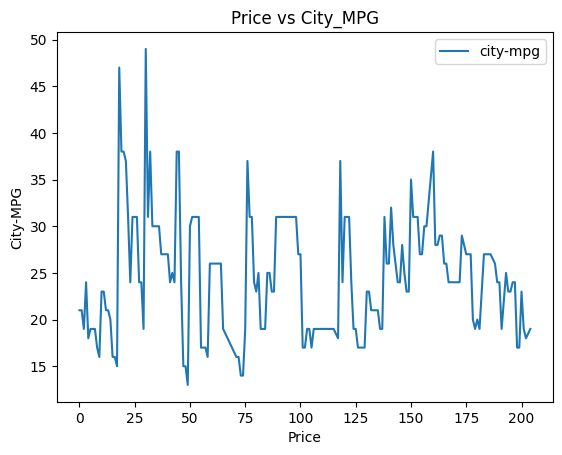

In [23]:
# Print a Quick plot comparing the two variables.

df[['price', 'city-mpg']].plot(title='Price vs City_MPG', xlabel='Price', ylabel='City-MPG')

In [24]:
# Clean the data, remove all Null

comparison = df[['price', 'city-mpg']]

comparison = comparison.replace('?', np.nan)

comparison = comparison.apply(pd.to_numeric, errors='coerce')

comparison = comparison.fillna(comparison.median())

comparison

,price,city-mpg
0,13495.0,21
1,16500.0,21
2,16500.0,19
3,13950.0,24
4,17450.0,18
...,...,...
199,18950.0,17
200,16845.0,23
201,19045.0,19
202,21485.0,18


In [25]:
# Confirm that there are no Null

df.isnull().values.any()

False

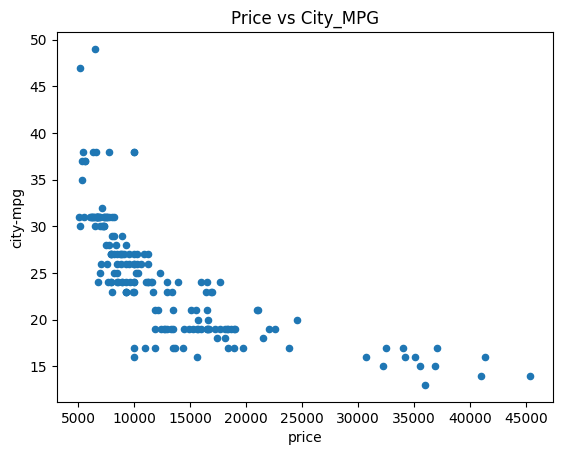

In [26]:
# Scaterplot of price vs. city-mpg

comparison.plot.scatter(x='price', y='city-mpg', title='Price vs City_MPG')
plt.show()

In [27]:
# Train a Linear Regression model to predict vehicle price based on city MPG and evaluate its performance.
# Step 1: Extract feature (city-mpg) and target (price), reshaped to 2D arrays.
# Step 2: Split the data into training (80%) and testing (20%) sets.
# Step 3: Train a Linear Regression model using the training data.
# Step 4: Predict vehicle prices on the test set.
# Step 5: Evaluate the model's performance using the following metrics:
#   - Mean Absolute Error (MAE): Measures the average absolute difference between predictions and actual prices, 
#     providing an intuitive sense of the average error in dollars.
#   - Mean Squared Error (MSE): Measures the average squared difference between predictions and actual values, 
#     penalizing larger errors more heavily to emphasize significant deviations.
#   - Root Mean Squared Error (RMSE): The square root of MSE, giving an error metric in the same units as the target variable, 
#     making it easier to interpret as an average prediction error.

X = comparison['city-mpg'].values.reshape(-1,1)
y = comparison['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3248.8382270573366
Mean Squared Error: 26707974.23814674
Root Mean Squared Error: 5167.975835677518


Regression line equation is: y = -886.4030146536039 * x + 34720.915453400245


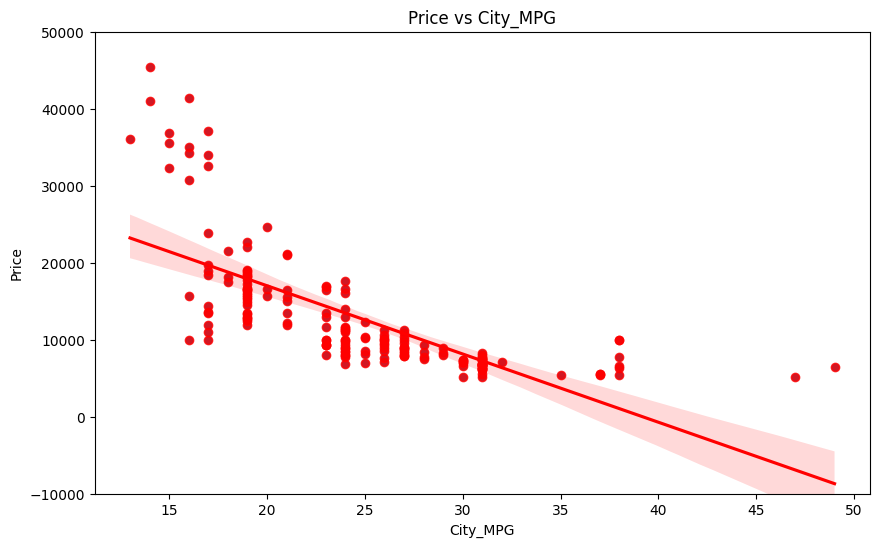

In [28]:
# Scatterplot with Linear regression showing a Moderatley Strong Negative Linear Relationship between vehicle price and its city-mpg.
# Regression Line Question Listed Below.

X = comparison['city-mpg']
y = comparison['price']

slope, intercept = np.polyfit(X, y, 1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X, y=y)

sns.regplot(x=X, y=y, color='red')

plt.title('Price vs City_MPG')
plt.xlabel('City_MPG')
plt.ylabel('Price')

plt.ylim(-10000, 50000)

print(f"Regression line equation is: y = {slope} * x + {intercept}")

plt.show()



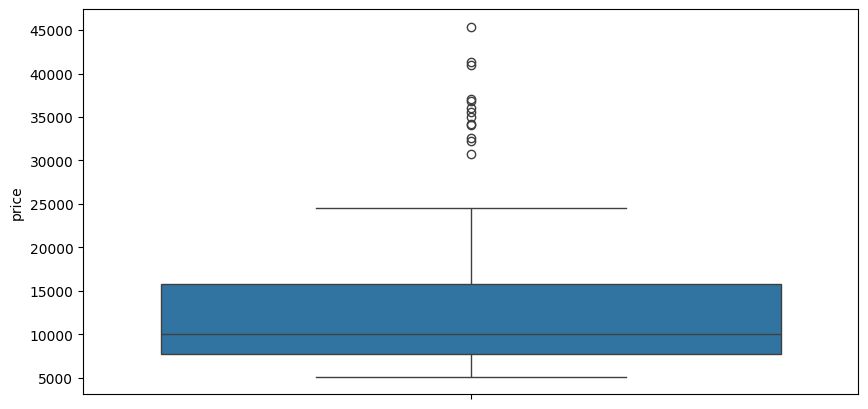

In [29]:
# Box Plot showing where most cars fall in price.

plt.figure(figsize=(10, 5))
sns.boxplot(data=comparison['price'])
plt.show()


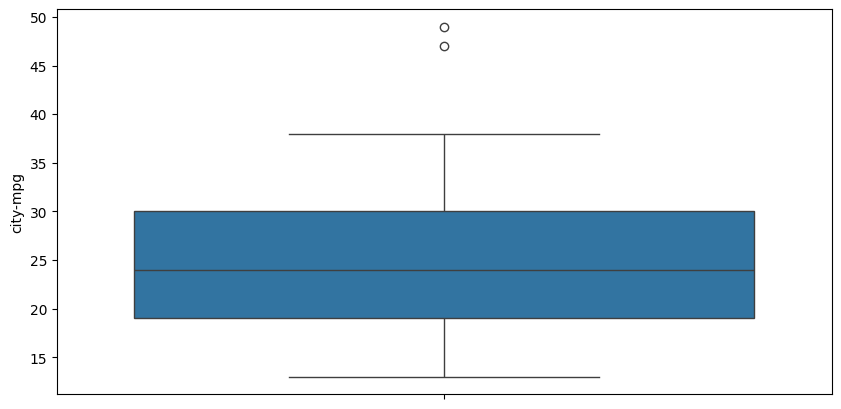

In [30]:
# Box Plot showing where most cars fall in city-mpg.

plt.figure(figsize=(10, 5))
sns.boxplot(data=comparison['city-mpg'])
plt.show()


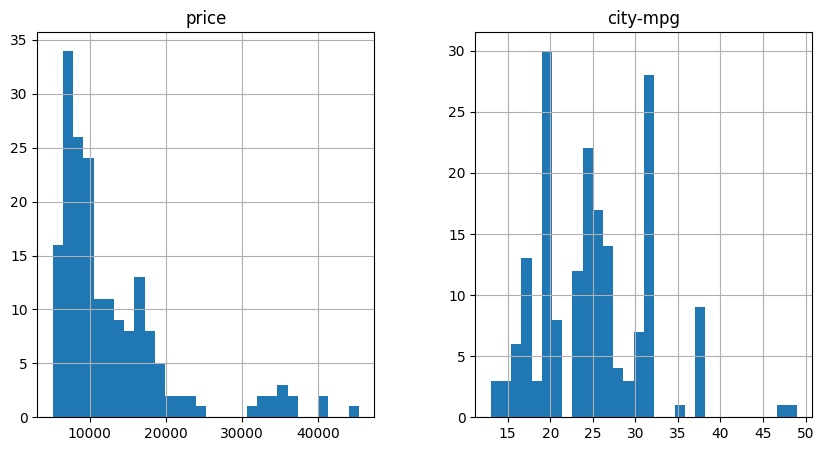

In [31]:
# Side-to-Side comparison of price and and city-mpg in Histogram.

comparison[['price', 'city-mpg']].hist(bins=30, figsize=(10, 5))
plt.show()


In [32]:
# Initial Linear Regression

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = comparison['price'].values.reshape(-1,1)
y = comparison['city-mpg'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)


print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))


Mean squared error: 23.33
Coefficient of determination: 0.46


In [33]:
# Utilize Polynomial Regression to achieve a better coefficient of determination.

X = comparison['price'].values.reshape(-1,1)
y = comparison['city-mpg'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

degree = 2

model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Coefficients: \n', model.named_steps['linearregression'].coef_)

print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))

Coefficients: 
 [[ 0.00000000e+00 -1.65457073e-03  2.64659582e-08]]
Mean squared error: 14.24
Coefficient of determination: 0.67


In [34]:
# Test Scenarios 1: $15,000 Car - Model Works

price = np.array([15000]).reshape(-1, 1)

predicted_city_mpg = model.predict(price)

print("The predicted city-mpg for a car with a price of $15,000 is: ", predicted_city_mpg[0][0])


The predicted city-mpg for a car with a price of $15,000 is:  20.966823315275494


In [35]:
# Test Scenarios 2: $35,000 Car - Model Works

price = np.array([35000]).reshape(-1, 1)

predicted_city_mpg = model.predict(price)

print("The predicted city-mpg for a car with a price of $35,000 is: ", predicted_city_mpg[0][0])

The predicted city-mpg for a car with a price of $35,000 is:  14.341366866833205


In [36]:
# Test Scenarios 3: $60,000 Car - Model Fails, Model was trained on data up to $45,000

price = np.array([60000]).reshape(-1, 1)

predicted_city_mpg = model.predict(price)

print("The predicted city-mpg for a car with a price of $60,000 is: ", predicted_city_mpg[0][0]) 

The predicted city-mpg for a car with a price of $60,000 is:  35.83374931513422
